Importing the Library file

In [51]:
import pandas as pd
import numpy as np
# from __future__ import print_function
from datetime import datetime
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score,fbeta_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

reading the data

In [52]:
df = pd.read_csv('german_credit_data.csv')

In [53]:
df.head(3)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good


In [54]:
df = df.drop(columns = ['Unnamed: 0'])

In [55]:
df.head(2)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad


general Overview of the data

In [56]:
df.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.546000,1.904000,3271.258000,20.903000
std,11.375469,0.653614,2822.736876,12.058814
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,75.000000,3.000000,18424.000000,72.000000


In [57]:
df.isna().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [58]:
# np.unique(df['Saving accounts'],return_counts=True)

In [59]:
df.groupby(df['Saving accounts'])['Saving accounts'].size()

Saving accounts
little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [60]:
df_back_mod = df
df_forward_mod =df

In [61]:
df_forward_mod = df_back_mod.fillna(method='ffill')
df_forward_mod.head(3)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,moderate,2096,12,education,good


In [62]:
df_forward_mod.isna().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     1
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [63]:
df_back_mod = df_back_mod.fillna(method='bfill')
df_back_mod.head(3)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,little,2096,12,education,good


In [64]:
df_back_mod.isna().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [65]:
df_back_mod.groupby(df_back_mod['Saving accounts'])['Saving accounts'].size()

Saving accounts
little        739
moderate      122
quite rich     81
rich           58
Name: Saving accounts, dtype: int64

In [66]:
df_forward_mod.groupby(df_forward_mod['Saving accounts'])['Saving accounts'].size()

Saving accounts
little        740
moderate      127
quite rich     75
rich           57
Name: Saving accounts, dtype: int64

Label encoding the categorical variables

In [67]:
cols = ["Sex", "Housing", "Saving accounts", "Checking account", "Purpose" , "Risk"]
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df_back_mod[cols] = df_back_mod[cols].apply(le.fit_transform)


Splitting the Data

In [68]:
X =df_back_mod.drop('Risk', axis=1).values
y = df_back_mod['Risk'].values


now as per the algorithm we first have to set the threshold and check for the value of fisher score for each attribute and then decide on the importance of each features/attributes in the Dataset.

so for defining threshold we would a make a copy of dataset then shuffle values in each column and z core claculated using random forest classifier.Now algorithm use real features and compares its fisher score with the fisher score of the shuffled features which is there as a threshold.So if the fisher score of real features is greater than shuffled(threshold) it will take it as an important features other wise discard it.

Boruta uses the above concept and elimnates one with least important


In [69]:
rfc = RandomForestClassifier(n_estimators=200, n_jobs=4, class_weight='balanced', max_depth=6)
boruta_selector = BorutaPy(rfc, n_estimators='auto', verbose=2)
boruta_selector.fit(X, y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	3
Tentative: 	0
Rejected: 	6


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	3
Tentative: 	0
Rejected: 	6


BorutaPy(alpha=0.05,
     estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=6, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=70, n_jobs=4, oob_score=False,
            random_state=<mtrand.RandomState object at 0x7fcbcc09ec60>,
            verbose=0, warm_start=False),
     max_iter=100, n_estimators='auto', perc=100,
     random_state=<mtrand.RandomState object at 0x7fcbcc09ec60>,
     two_step=True, verbose=2)

## Criteria Used for Z-Score

BorutaPy(alpha=0.05,
     estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=6, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=40, n_jobs=4, oob_score=False,
            verbose=0, warm_start=False)

In [70]:
feature_df = pd.DataFrame(df_back_mod.drop(['Risk'], axis=1).columns.tolist(), columns=['features'])

In [71]:
feature_df['rank']=boruta_selector.ranking_
feature_df = feature_df.sort_values('rank', ascending=True).reset_index(drop=True)

feature ranking

In [72]:
feature_df

,features,rank
0,Age,1
1,Credit amount,1
2,Duration,1
3,Purpose,2
4,Checking account,3
5,Saving accounts,4
6,Housing,5
7,Job,6
8,Sex,7


So, here Housing,Job and Sex are three features which were elimnated from boruta based on scoring criteria as shown above.
So now, we will take the other features and run the model.

Original Ts

In [73]:
Ts = pd.DataFrame([df_back_mod['Age'],df_back_mod['Credit amount'],df_back_mod['Duration'],df_back_mod['Saving accounts'],df_back_mod['Purpose'],df_back_mod['Checking account']]).T

In [74]:
Ts.head(3)


,Age,Credit amount,Duration,Saving accounts,Purpose,Checking account
0,67,1169,6,0,5,0
1,22,5951,48,0,5,1
2,49,2096,12,0,3,0


Another Ts where rejected values from the z score will be there.

In [75]:
NTs = pd.DataFrame([df_back_mod['Housing'],df_back_mod['Job'],df_back_mod['Sex']]).T


In [76]:
NTs.head(3)

,Housing,Job,Sex
0,1,2,1
1,1,2,0
2,1,1,1


In [77]:
Ts_new = Ts.copy()

In [78]:
Ts_new['Housing'] = pd.Series(NTs['Housing'])  ## adding Housing to the original dataframe.

In [79]:
Ts_new_1  = Ts_new.copy()
Ts_new_1['Job'] = pd.Series(NTs['Job'])  ## adding housing ,job to the original dataframe.

In [80]:
Ts.head(3)

,Age,Credit amount,Duration,Saving accounts,Purpose,Checking account
0,67,1169,6,0,5,0
1,22,5951,48,0,5,1
2,49,2096,12,0,3,0


In [81]:
Ts_new_2 = Ts_new_1.copy()
Ts_new_2['Sex'] = pd.Series(NTs['Sex'])  ## adding Sex,housing and job to the original dataframe.

In [82]:
Ts_new_2.head(2)

,Age,Credit amount,Duration,Saving accounts,Purpose,Checking account,Housing,Job,Sex
0,67,1169,6,0,5,0,1,2,1
1,22,5951,48,0,5,1,1,2,0


In [83]:
X_test_1

array([[-0.19918487, -0.73828727, -0.23420585, -0.53260456,  0.55626304,
        -0.983745  ],
       [ 0.3333272 ,  3.05670636,  0.27101478, -0.53260456,  2.07531684,
         0.50677773],
       [-0.19918487, -0.22980658, -0.73942647, -0.53260456, -0.96279077,
        -0.983745  ],
       ...,
       [ 0.86583927, -0.32672693,  0.27101478, -0.53260456, -0.96279077,
        -0.983745  ],
       [-0.37668889, -0.02543106,  0.27101478, -0.53260456, -1.46914204,
        -0.983745  ],
       [-0.82044895,  0.70744131,  0.01840447, -0.53260456, -0.96279077,
        -0.983745  ]])

In [37]:
# Saving seed 
# divide_seed = np.random.randint(1, 100)

# And then split the data
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
    Ts, y, test_size=0.3)

# And check if they splitted correctly
print(len(X_train_1))
print(len(X_test_1))
print(len(y_train_1))
print(len(y_test_1))

700
300
700
300


In [38]:
scaler = StandardScaler()

# We normalize train sample
scaler.fit(X_train_1)
X_train_1 = scaler.transform(X_train_1)

# And test sample
# scaler.fit(X_test_2)
X_test_1 = scaler.transf4orm(X_test_1)

/home/abin/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/abin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """
/home/abin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


In [39]:
X_train_1.shape

(700, 6)

In [40]:
X_train_1.shape

(700, 6)

In [41]:
# Saving seed 
# divide_seed = np.random.randint(1, 100)

# And then split the data
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
    Ts_new, y, test_size=0.3)

# # And check if they splitted correctly
print(len(X_train_2))
print(len(X_test_2))
print(len(y_train_2))
print(len(y_test_2))

700
300
700
300


In [42]:
scaler = StandardScaler()

# We normalize train sample
scaler.fit(X_train_2)
X_train_2 = scaler.transform(X_train_2)

# And test sample
# scaler.fit(X_test_2)
X_test_2 = scaler.transform(X_test_2)

/home/abin/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/home/abin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  """
/home/abin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


In [43]:
X_train_2.shape

(700, 7)

### Ts_New (added Housing as one of the feature)

In [44]:
clf = RandomForestClassifier( random_state=13, class_weight="balanced", max_depth=10, n_estimators=150)


In [45]:
clf.fit(X_train_2, y_train_2)


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=None, oob_score=False,
            random_state=13, verbose=0, warm_start=False)

In [46]:
y_pred_2=clf.predict(X_test_2)
print("Accuracy:", metrics.accuracy_score(y_test_2,y_pred_2))
print("matrix", confusion_matrix(y_test_2, y_pred_2))
print("auc", roc_auc_score(y_test_2, y_pred_2))
print("f1", f1_score(y_test_2, y_pred_2))
# print("f2", fbeta_score(y_test, y_pred))

from sklearn.metrics import classification_report

print('report', classification_report(y_test_2, y_pred_2))


Accuracy: 0.7133333333333334
matrix [[ 30  62]
 [ 24 184]]
auc 0.6053511705685619
f1 0.8105726872246696
report               precision    recall  f1-score   support

           0       0.56      0.33      0.41        92
           1       0.75      0.88      0.81       208

   micro avg       0.71      0.71      0.71       300
   macro avg       0.65      0.61      0.61       300
weighted avg       0.69      0.71      0.69       300



### Original Ts (ranked feature according to fisher Score ie. original Ts)

In [47]:
# X_train_1.shape

In [48]:
clf.fit(X_train_1, y_train_1)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=10, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=None, oob_score=False,
            random_state=13, verbose=0, warm_start=False)

In [49]:
y_pred_1=clf.predict(X_test_1)
print("Accuracy:", metrics.accuracy_score(y_pred_1, y_test_1))
print("matrix", confusion_matrix(y_test_1, y_pred_1))
print("auc", roc_auc_score(y_test_1, y_pred_1))
print("f1", f1_score(y_test_1, y_pred_1))
# print("f2", fbeta_score(y_test, y_pred))

from sklearn.metrics import classification_report

print('report', classification_report(y_test_1, y_pred_1))


Accuracy: 0.68
matrix [[ 38  58]
 [ 38 166]]
auc 0.604779411764706
f1 0.7757009345794393
report               precision    recall  f1-score   support

           0       0.50      0.40      0.44        96
           1       0.74      0.81      0.78       204

   micro avg       0.68      0.68      0.68       300
   macro avg       0.62      0.60      0.61       300
weighted avg       0.66      0.68      0.67       300



clearly the accuracy which was the metrics of your test case which has not been imporved after adding Housing as the feature so we will stop it from here.

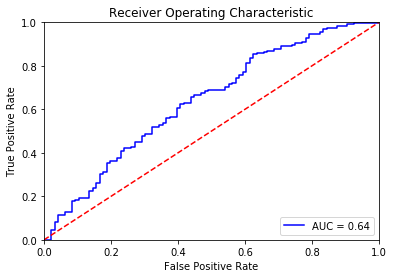

In [84]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(X_test_1)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test_1, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


## END
